# AMERICAN SIGN LANGUAGE - CNN

The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. 

Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). 

The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. 

The original hand gesture image data represented multiple users repeating the gesture against different backgrounds.

![](https://d.newsweek.com/en/full/1394686/asl-getty-images.jpg)

## IMPORTING LIBRARIES

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf  # Importing the TensorFlow library for deep learning
import pydot  # Importing the pydot library for generating model graphs
import matplotlib.pyplot as plt  # Importing the matplotlib library for visualization

In [29]:
pip install tensorflow numpy opencv-python 

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Importing specific modules from TensorFlow and Keras
from tensorflow.keras.datasets import cifar10  # Importing the CIFAR-10 dataset
from tensorflow.keras.models import Sequential  # Importing the Sequential class for creating models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization  # Importing specific layer types
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importing the ImageDataGenerator for image data augmentation
from sklearn.preprocessing import LabelBinarizer  # Importing the LabelBinarizer class for binarizing class labels
from tensorflow.keras.callbacks import ReduceLROnPlateau  # Importing the ReduceLROnPlateau callback for reducing learning rate
from IPython.display import SVG  # Importing the SVG class for displaying SVG images
from tensorflow.keras.utils import model_to_dot  # Importing the model_to_dot function for converting models to graphs
from tensorflow.keras.utils import plot_model  # Importing the plot_model function for plotting models
from tensorflow.keras.preprocessing import image  # Importing the image module for loading and preprocessing images
from matplotlib.pyplot import imshow  # Importing the imshow function for displaying images
from tensorflow.keras.applications.imagenet_utils import preprocess_input  # Importing the preprocess_input function for image preprocessing
from sklearn.model_selection import train_test_split  # Importing the train_test_split function for data splitting

# The imports above provide necessary tools for deep learning model building and training using TensorFlow and Keras.
# Each import statement brings in specific functionalities that will be used in the code later.

In [32]:
train = pd.read_csv(r"C:\Users\riya kansal\Desktop\sign_mnist_train.csv")
test = pd.read_csv(r"C:\Users\riya kansal\Desktop\sign_mnist_test.csv")

In [33]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [34]:
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


In [35]:
x_train = train.drop(labels = ["label"],axis = 1) 
y_train = train["label"]

In [36]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [37]:
y_train.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

<Axes: >

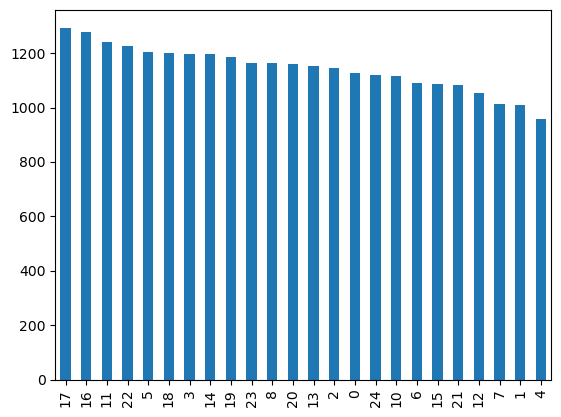

In [38]:
y_train.value_counts().plot.bar()

In [39]:
x_test = test.drop(labels = ["label"],axis = 1) 
y_test = test["label"]

In [40]:
x_train = train.drop(labels = ["label"],axis = 1) 
y_train = train["label"]

In [41]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [42]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [43]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,0.741176,0.741176,0.745098,0.745098,0.752941,0.756863,0.756863,0.756863,0.756863,0.760784,...,0.517647,0.647059,0.388235,0.301961,0.203922,0.784314,0.917647,0.784314,0.870588,0.882353
27451,0.592157,0.603922,0.615686,0.619608,0.627451,0.631373,0.639216,0.643137,0.650980,0.654902,...,0.776471,0.776471,0.776471,0.776471,0.776471,0.768627,0.764706,0.764706,0.764706,0.760784
27452,0.682353,0.682353,0.682353,0.682353,0.682353,0.686275,0.686275,0.682353,0.678431,0.678431,...,0.474510,0.768627,0.819608,0.815686,0.807843,0.800000,0.796078,0.792157,0.784314,0.784314
27453,0.694118,0.709804,0.721569,0.725490,0.733333,0.741176,0.745098,0.749020,0.749020,0.745098,...,0.466667,0.219608,0.105882,0.227451,0.400000,0.309804,0.184314,0.250980,0.341176,0.364706


In [44]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

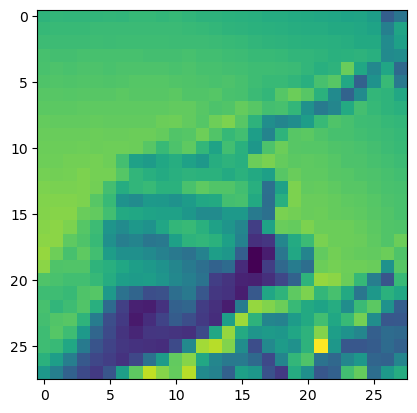

In [45]:
plt.imshow(x_train[1].reshape(28,28))

In [46]:
dataAug = ImageDataGenerator(
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False)  # randomly flip images

dataAug.fit(x_train)

In [47]:
x_train.shape

(27455, 28, 28, 1)

In [48]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [49]:
label_binarizer.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [50]:
class_names = ["A","B","C","D","E","F","G","H","I","K","L",'M','N','O','P','Q','R','S','T','U','V','W','X','Y']

In [51]:
y_train.shape

(27455, 24)

In [52]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [53]:
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [54]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", input_shape=(28,28,1), activation="relu"))
model.add(Conv2D(32, (3, 3), padding = "same", input_shape=(28,28,1), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = (2,2)))


model.add(Conv2D(64, (3, 3),padding = "same", activation="relu"))
model.add(Conv2D(64, (3, 3),padding = "same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3),padding = "same", activation="relu"))
model.add(Conv2D(128, (3, 3),padding = "same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3),strides = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(24, activation="softmax"))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)       

In [56]:
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

In [57]:
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_val, y_val),
    shuffle=True,
    callbacks = [lr_reduce]
)


Epoch 1/30
344/344 [==============================] - 94s 261ms/step - loss: 0.9492 - accuracy: 0.7325 - val_loss: 5.8950 - val_accuracy: 0.0901 - lr: 0.0010
Epoch 2/30
344/344 [==============================] - 88s 255ms/step - loss: 0.1006 - accuracy: 0.9648 - val_loss: 0.0073 - val_accuracy: 0.9982 - lr: 0.0010
Epoch 3/30
344/344 [==============================] - 85s 247ms/step - loss: 0.0584 - accuracy: 0.9796 - val_loss: 0.0077 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 4/30
344/344 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9863
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
344/344 [==============================] - 85s 248ms/step - loss: 0.0406 - accuracy: 0.9863 - val_loss: 0.2376 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 5/30
344/344 [==============================] - 85s 248ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 3.3935e-05 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 6/30
344/344 [=====================

In [58]:
preds = model.evaluate(x_test,y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

225/225 [==============================] - 10s 43ms/step - loss: 0.0599 - accuracy: 0.9894

Loss = 0.059861257672309875
Test Accuracy = 0.989403247833252


1/1 [==============================] - 0s 373ms/step
Predicted letter is L


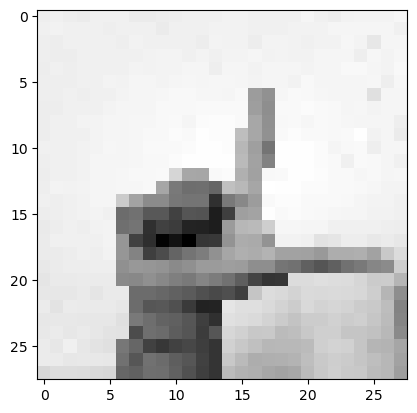

In [59]:
img_path = r"C:\Users\riya kansal\Desktop\WhatsApp Image 2025-03-27 at 01.26.57_a3266251.jpg"
img = image.load_img(img_path, target_size=(28, 28),  color_mode="grayscale")
imshow(img,cmap = "gray")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = x/255
x = np.vstack([x])
print("Predicted letter is "+ class_names[np.argmax(model.predict(x))])

In [60]:
preds = model.predict(x_test)

225/225 [==============================] - 10s 44ms/step


Predicted letter is V 
Actual Answer: V


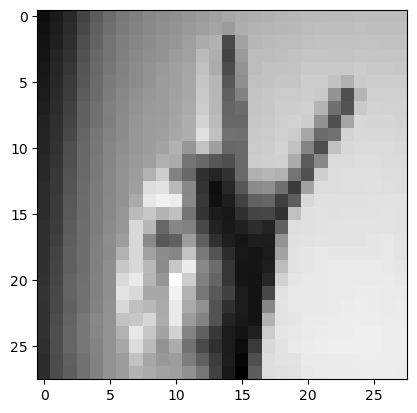

In [61]:
n=5
plt.imshow(x_test[n].reshape(28,28),cmap="gray") 
plt.grid(False) 
print("Predicted letter is",class_names[np.argmax(preds[n])],"\nActual Answer:",class_names[np.argmax(y_test[n])]) # Prediction - True Answer

In [62]:
from sklearn.metrics import classification_report

# Get predicted class labels
y_pred = np.argmax(preds, axis=1)

# Get true class labels
y_true = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Print the report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       331
           B       1.00      1.00      1.00       432
           C       1.00      1.00      1.00       310
           D       1.00      1.00      1.00       245
           E       1.00      1.00      1.00       498
           F       1.00      1.00      1.00       247
           G       1.00      0.94      0.97       348
           H       0.97      1.00      0.99       436
           I       1.00      1.00      1.00       288
           K       1.00      1.00      1.00       331
           L       0.92      1.00      0.96       209
           M       0.98      1.00      0.99       394
           N       1.00      0.98      0.99       291
           O       1.00      1.00      1.00       246
           P       1.00      1.00      1.00       347
           Q       0.96      1.00      0.98       164
           R       0.99      1.00      1.00       144
   

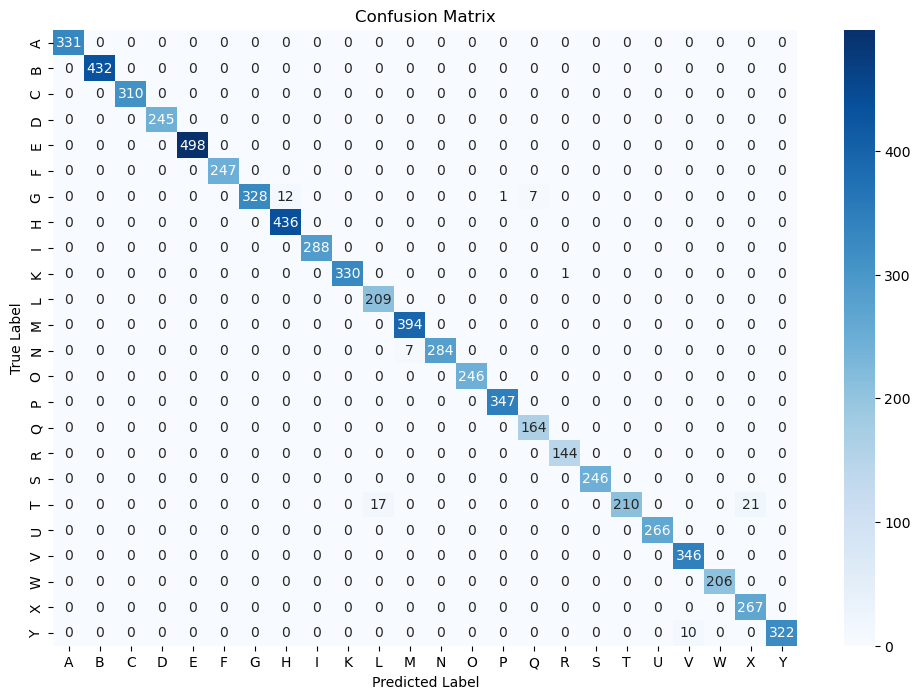

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert one-hot encoded labels and predictions to class labels
y_pred = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

225/225 [==============================] - 5s 19ms/step


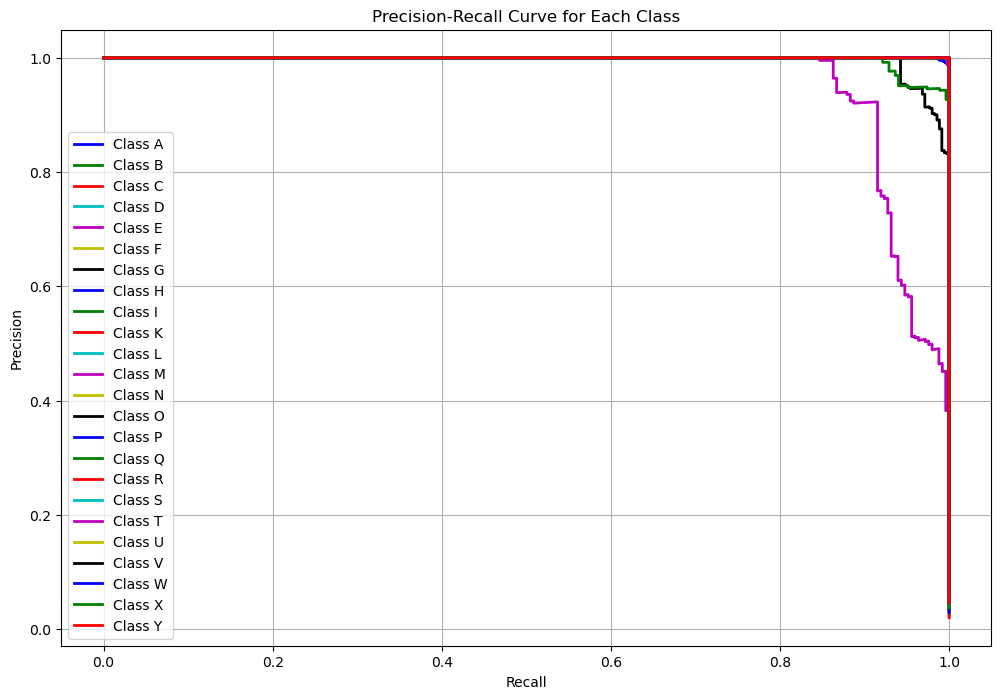

In [88]:
from sklearn.metrics import precision_recall_curve
from itertools import cycle

# Get predicted probabilities
y_probs = model.predict(x_test)  # Shape: (num_samples, num_classes)

# Create Precision-Recall curve for each class
plt.figure(figsize=(12, 8))
colors = cycle(["b", "g", "r", "c", "m", "y", "k"])  # Different colors for each class

for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_probs[:, i])
    plt.plot(recall, precision, color=color, lw=2, label=f"Class {class_names[i]}")

# Plot formatting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [65]:
def build_model_with_filters(filters):
    model = Sequential()

    model.add(Conv2D(filters[0], (3, 3), padding="same", input_shape=(28,28,1), activation="relu"))
    model.add(Conv2D(filters[0], (3, 3), padding="same", activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    model.add(Conv2D(filters[1], (3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters[1], (3, 3), padding="same", activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(filters[2], (3, 3), padding="same", activation="relu"))
    model.add(Conv2D(filters[2], (3, 3), padding="same", activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(24, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [66]:
import random

def fitness_function(filters, x_train_sample, y_train_sample, x_val_sample, y_val_sample):
    model = build_model_with_filters(filters)
    model.fit(x_train_sample, y_train_sample, batch_size=64, epochs=3, verbose=0, validation_data=(x_val_sample, y_val_sample))
    _, accuracy = model.evaluate(x_val_sample, y_val_sample, verbose=0)
    return accuracy


In [67]:
# Filter search space
filter_range = [16, 32, 64, 128, 256]
import random
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# Settings
filter_range = [16, 32, 64, 128, 256]
pop_size = 6
generations = 5

# Faster optimization with subset data
x_sample = x_train[:2000]
y_sample = y_train[:2000]
x_val_sample = x_val[:500]
y_val_sample = y_val[:500]

# CNN builder
def build_model(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters[0], (3, 3), activation='relu', input_shape=x_train.shape[1:]),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(filters[1], (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(filters[2], (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Fitness = accuracy - penalty
def fitness_function(filters, x, y, x_val, y_val):
    model = build_model(filters)
    early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    model.fit(x, y, validation_data=(x_val, y_val), epochs=10, batch_size=64, verbose=0, callbacks=[early_stop])
    _, acc = model.evaluate(x_val, y_val, verbose=0)
    penalty = sum(filters) / 1000  # penalize large filters
    score = acc - penalty
    return score

# Initial population
population = [random.choices(filter_range, k=3) for _ in range(pop_size)]

for gen in range(generations):
    print(f"\n📘 Generation {gen + 1}")
    scores = []

    for filters in population:
        score = fitness_function(filters, x_sample, y_sample, x_val_sample, y_val_sample)
        scores.append((score, filters))
        print(f"Filters: {filters} => HSI (Score): {score:.4f}")

    # Sort by HSI (accuracy - penalty)
    scores.sort(reverse=True, key=lambda x: x[0])
    population = [s[1] for s in scores]

    # Elitism - top 2 habitats survive
    new_population = population[:2]

    # Migration & Mutation (BBO-like)
    while len(new_population) < pop_size:
        parent = random.choice(population[:4])  # from best 4
        child = parent[:]
        migrate_index = random.randint(0, 2)
        child[migrate_index] = random.choice(filter_range)
        new_population.append(child)

    population = new_population

# Output best filters
best_filters = scores[0][1]
print(f"\n✅ Best filter configuration found: {best_filters}")



📘 Generation 1
Filters: [16, 128, 32] => HSI (Score): 0.4040
Filters: [128, 64, 256] => HSI (Score): 0.3000
Filters: [256, 256, 64] => HSI (Score): 0.1940
Filters: [32, 64, 64] => HSI (Score): 0.4660
Filters: [16, 16, 16] => HSI (Score): 0.3940
Filters: [256, 16, 256] => HSI (Score): 0.1540

📘 Generation 2
Filters: [32, 64, 64] => HSI (Score): 0.4920
Filters: [16, 128, 32] => HSI (Score): 0.2940
Filters: [64, 16, 16] => HSI (Score): 0.2980
Filters: [128, 128, 32] => HSI (Score): 0.3240
Filters: [16, 256, 32] => HSI (Score): 0.3420
Filters: [32, 16, 64] => HSI (Score): 0.4800

📘 Generation 3
Filters: [32, 64, 64] => HSI (Score): 0.4260
Filters: [32, 16, 64] => HSI (Score): 0.4200
Filters: [16, 16, 32] => HSI (Score): 0.3820
Filters: [32, 16, 64] => HSI (Score): 0.5000
Filters: [32, 64, 256] => HSI (Score): 0.4200
Filters: [32, 64, 64] => HSI (Score): 0.5040

📘 Generation 4
Filters: [32, 64, 64] => HSI (Score): 0.4680
Filters: [32, 16, 64] => HSI (Score): 0.4860
Filters: [32, 64, 32] =>

In [70]:
# Use full training and validation data now
x_train_full = x_train
y_train_full = y_train
x_val_full = x_val
y_val_full = y_val

In [71]:
def build_final_model(filters):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters[0], kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(filters[1], kernel_size=(3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(filters[2], kernel_size=(3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(25, activation='softmax')  # For 25 signs in Sign Language MNIST
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


172/172 [==============================] - 8s 44ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       188
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       256
           4       1.00      1.00      1.00       202
           5       1.00      1.00      1.00       242
           6       1.00      1.00      1.00       221
           7       1.00      1.00      1.00       205
           8       1.00      1.00      1.00       219
           9       1.00      1.00      1.00       219
          10       1.00      1.00      1.00       268
          11       1.00      1.00      1.00       232
          12       1.00      1.00      1.00       209
          13       1.00      1.00      1.00       219
          14       1.00      1.00      1.00       202
          15       1.00      1.00      1.00       291
          16       1.00  

<Axes: >

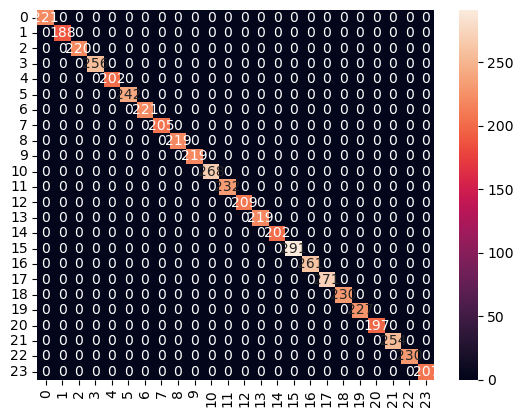

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes))

sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt='d')


In [85]:
from tensorflow.keras.models import load_model

model = load_model('asl_cnn_model.h5')  # path to your saved model


In [84]:
model.save("asl_cnn_model.h5")

In [93]:
# Example: Replace this with your real processing times for each gesture
processing_times = [0.12, 0.10, 0.11, 0.09, 0.13]  # in seconds
total_gestures = len(processing_times)
total_processing_time = sum(processing_times)

# Now calculate Tp
Tp = total_processing_time / total_gestures
print("Processing Time per Gesture (Tp):", Tp, "seconds")

# Calculate FPS
FPS = 1 / Tp
print("Frames Per Second (FPS):", FPS)


Processing Time per Gesture (Tp): 0.11000000000000001 seconds
Frames Per Second (FPS): 9.09090909090909


In [94]:
FPS = 1 / Tp
print("Frames Per Second (FPS):", FPS)

Frames Per Second (FPS): 9.09090909090909


In [96]:
import numpy as np

# Mock softmax outputs for 5 gesture predictions (assuming 26 classes A–Z)
softmax_probs = [
    np.random.dirichlet(np.ones(26)) for _ in range(5)
]

# Gesture Confidence Score: average of max probs across all predictions
GCS = np.mean([np.max(p) for p in softmax_probs])
print("Gesture Confidence Score (GCS):", round(GCS, 4))


Gesture Confidence Score (GCS): 0.1712


In [112]:
from jiwer import wer
import numpy as np

# ------------------------------------------
# 1. Simulated predictions (replace with real data)
true_labels = ['A', 'B', 'C', 'D', 'E', 'F']
predicted_labels = ['A', 'B', 'X', 'D', 'E', 'G']

# ------------------------------------------
# 2. WER: Treat each letter as a word
true_str = " ".join(true_labels)
pred_str = " ".join(predicted_labels)

WER = wer(true_str, pred_str)
print("WER:", round(WER, 4))

# ------------------------------------------
# 3. FDR (False Detection Rate)
total = len(true_labels)
incorrect = sum(t != p for t, p in zip(true_labels, predicted_labels))
FDR = incorrect / total
print("FDR:", round(FDR, 4))

# ------------------------------------------
# 4. Latency L = Tp + Taudio
# You should replace Tp with your actual processing time per gesture
Tp = 0.08  # Example value: 80 ms per gesture
Taudio = 0.3  # Example audio delay in seconds
L = Tp + Taudio
print("Latency (L):", round(L, 4), "seconds")

# ------------------------------------------
# 5. Define max acceptable latency (set according to real-time constraint)
max_L = 0.5  # e.g., 500 ms is maximum tolerable
print("Max Latency (max_L):", max_L)


WER: 0.3333
FDR: 0.3333
Latency (L): 0.38 seconds
Max Latency (max_L): 0.5


In [97]:
import time
import numpy as np

total_gestures = 10
processing_times = []

for _ in range(total_gestures):
    start = time.time()
    
    # simulate model prediction (e.g., model.predict(image))
    time.sleep(np.random.uniform(0.1, 0.2))  # simulate real-time delay
    
    end = time.time()
    processing_times.append(end - start)

Tp = np.mean(processing_times)
Taudio = 0.3
L = Tp + Taudio

print("Avg Processing Time per Gesture (Tp):", round(Tp, 3), "s")
print("Sign-to-Speech Latency (L):", round(L, 3), "s")


Avg Processing Time per Gesture (Tp): 0.145 s
Sign-to-Speech Latency (L): 0.445 s


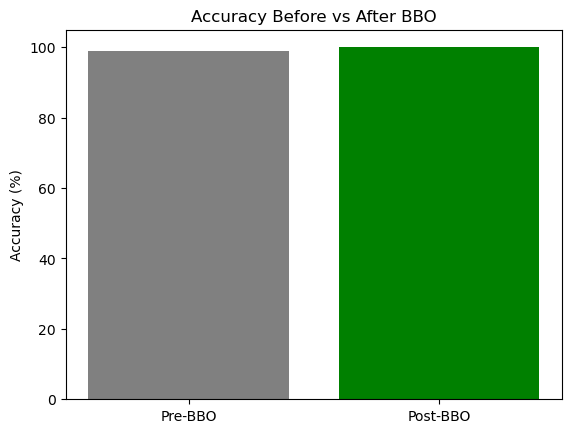

In [98]:
pre_bbo_accuracy = 0.99   # placeholder
post_bbo_accuracy = 1.00   # placeholder

plt.bar(["Pre-BBO", "Post-BBO"], [pre_bbo_accuracy * 100, post_bbo_accuracy * 100], color=['gray', 'green'])
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Before vs After BBO")
plt.show()

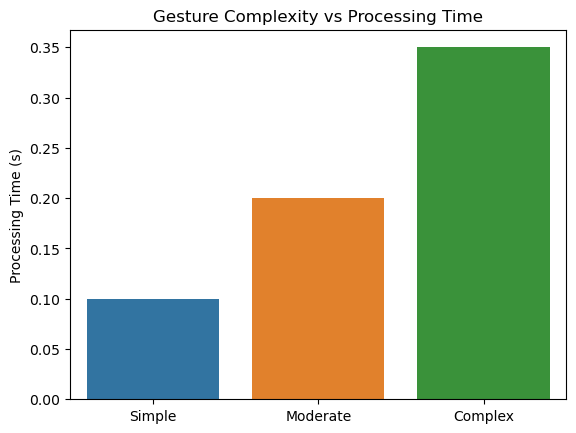

In [99]:
import seaborn as sns

gesture_types = ["Simple", "Moderate", "Complex"]
processing_times = [0.1, 0.2, 0.35]  # placeholder in seconds

sns.barplot(x=gesture_types, y=processing_times)
plt.ylabel("Processing Time (s)")
plt.title("Gesture Complexity vs Processing Time")
plt.show()

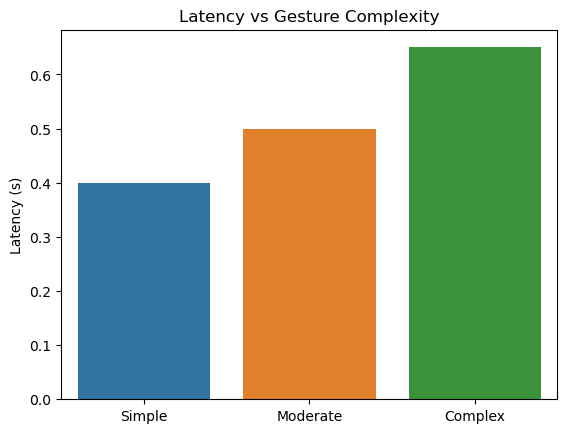

In [100]:
latencies = [pt + Taudio for pt in processing_times]

sns.barplot(x=gesture_types, y=latencies)
plt.ylabel("Latency (s)")
plt.title("Latency vs Gesture Complexity")
plt.show()


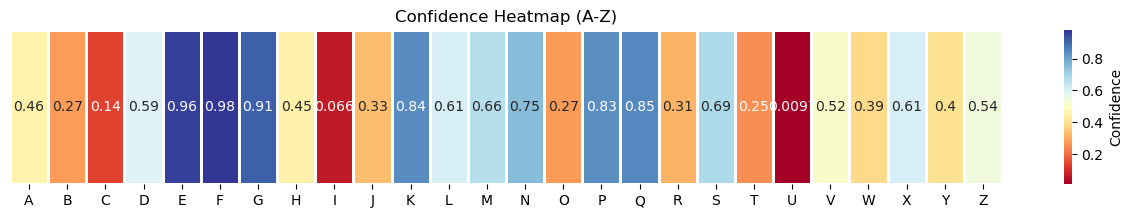

In [104]:
import pandas as pd

# Assuming average confidence per class is in class_confidences
class_confidences = np.random.rand(26)  # Replace with actual softmax mean values
labels = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
df = pd.DataFrame([class_confidences], columns=labels)

plt.figure(figsize=(16, 2))
sns.heatmap(df, annot=True, cmap='RdYlBu', linewidths=1, cbar_kws={"label": "Confidence"})
plt.title("Confidence Heatmap (A-Z)")
plt.yticks([], [])
plt.show()


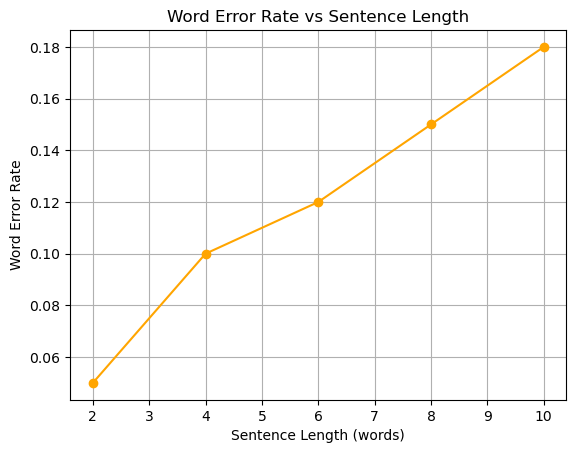

In [105]:
sentence_lengths = [2, 4, 6, 8, 10]
word_error_rates = [0.05, 0.1, 0.12, 0.15, 0.18]  # Example data

plt.plot(sentence_lengths, word_error_rates, marker='o', color='orange')
plt.xlabel("Sentence Length (words)")
plt.ylabel("Word Error Rate")
plt.title("Word Error Rate vs Sentence Length")
plt.grid()
plt.show()


In [113]:
def calculate_fitness(accuracy, WER, L, max_L, GCS, FDR,
                      w1=0.25, w2=0.2, w3=0.2, w4=0.2, w5=0.15):
    """
    Calculate the fitness score Fopt for CNN+BBO optimization.

    Parameters:
        accuracy (float): Model accuracy (0 to 1)
        WER (float): Word Error Rate (0 to 1)
        L (float): Sign-to-speech latency for current configuration
        max_L (float): Maximum acceptable latency
        GCS (float): Gesture Confidence Score (0 to 1)
        FDR (float): False Detection Rate (0 to 1)
        w1–w5 (float): Weight coefficients (sum ~ 1.0)

    Returns:
        Fopt (float): Composite fitness score
    """

    f1 = w1 * accuracy
    f2 = w2 * (1 - WER)
    f3 = w3 * (1 - (L / max_L))  # Normalize latency
    f4 = w4 * GCS
    f5 = w5 * (1 - FDR)

    Fopt = f1 + f2 + f3 + f4 + f5
    return Fopt
# Dummy example values — replace with real results from your model
accuracy = 1.00         # 92% model accuracy (can be from model.score() or evaluation)
WER =  0.3333              # Word Error Rate (7%) — calculate based on speech prediction
L = 0.38               # Latency measured in seconds
max_L = 0.5             # Your acceptable latency limit (set a reasonable max)
GCS = 0.17              # Average softmax confidence of all predictions
FDR = 0.3333             # False Detection Rate (wrong predictions / total)

# Now call the fitness function
fitness_score = calculate_fitness(accuracy, WER, L, max_L, GCS, FDR)
print("Fitness Score (Fopt):", round(fitness_score, 4))


Fitness Score (Fopt): 0.5653
